In [25]:
from typing import TypedDict

class GreetState(TypedDict):
    name: str
    greeting: str

In [26]:
import random

def normalize_name(state:GreetState) -> GreetState:
    name = ''.join(state['name'].split()).title()
    print(f'생성된 이름: {name}')

    return {'name': name}

In [27]:
def make_greeting(state:GreetState) -> GreetState:
    name = state['name']


    return {'greeting': f'Hello, {name}!'}

In [28]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(GreetState)

builder.add_node('normalize_name', normalize_name)
builder.add_node('make_greeting', make_greeting)

builder.add_edge(START, 'normalize_name')
builder.add_edge('normalize_name', 'make_greeting')
builder.add_edge('make_greeting', END)

graph = builder.compile()

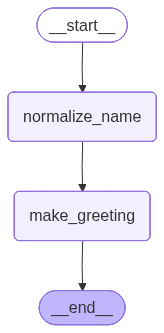

In [29]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [30]:
inputs = {'name': '   autumn   '}

result = graph.invoke(inputs)
print(result)

생성된 이름: Autumn
{'name': 'Autumn', 'greeting': 'Hello, Autumn!'}
